<a href="https://colab.research.google.com/github/srivastavask/cvlab-ai/blob/main/lab1/B41_E22CSEU1205_SHRISTI/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot_object(points, title, color='blue'):
    x, y = zip(*points)
    plt.plot(x + (x[0],), y + (y[0],), color=color, marker='o')  # Close the shape
    plt.title(title)
    plt.grid()
    plt.gca().set_aspect('equal', adjustable='box')


In [ ]:
rectangle = np.array([[1, 1], [4, 1], [4, 3], [1, 3]])

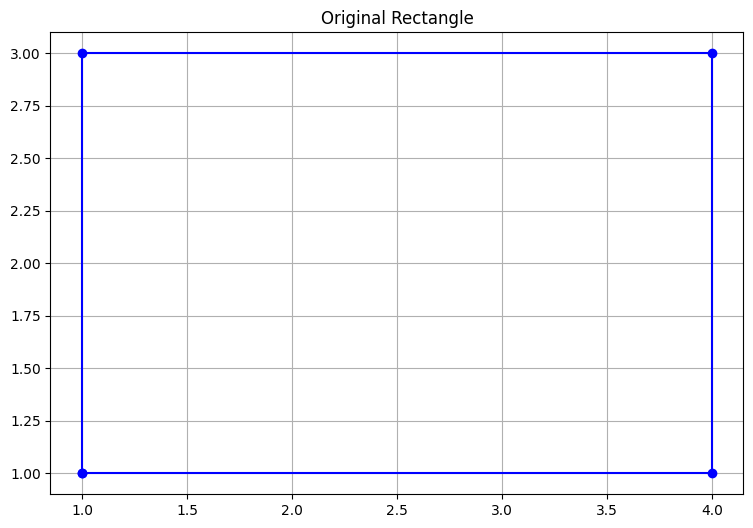

In [ ]:
plt.figure(figsize=(10, 6))
plot_object(rectangle, "Original Rectangle", color='blue')

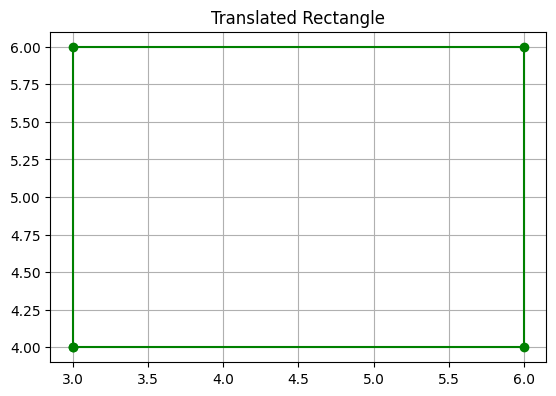

In [ ]:
translation_matrix = np.array([[1, 0, 2], [0, 1, 3], [0, 0, 1]])
rectangle_h = np.hstack([rectangle, np.ones((4, 1))])  # Convert to homogeneous coordinates
translated = rectangle_h @ translation_matrix.T
plot_object(translated[:, :2], "Translated Rectangle", color='green')

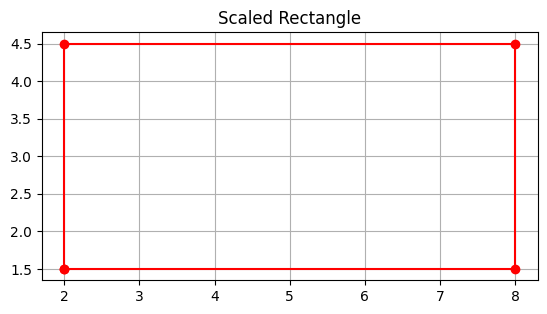

In [ ]:
# Scaling
scaling_matrix = np.array([[2, 0, 0], [0, 1.5, 0], [0, 0, 1]])
scaled = rectangle_h @ scaling_matrix.T
plot_object(scaled[:, :2], "Scaled Rectangle", color='red')

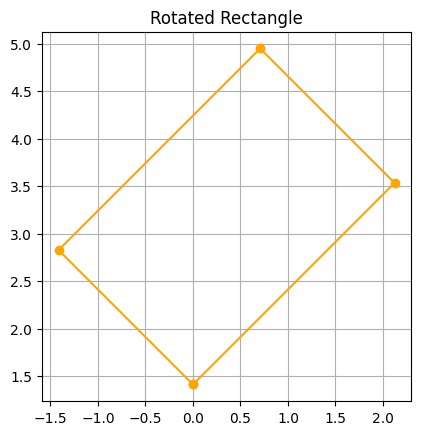

In [ ]:
theta = np.radians(45)
rotation_matrix = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0],
    [0, 0, 1]
])
rotated = rectangle_h @ rotation_matrix.T
plot_object(rotated[:, :2], "Rotated Rectangle", color='orange')

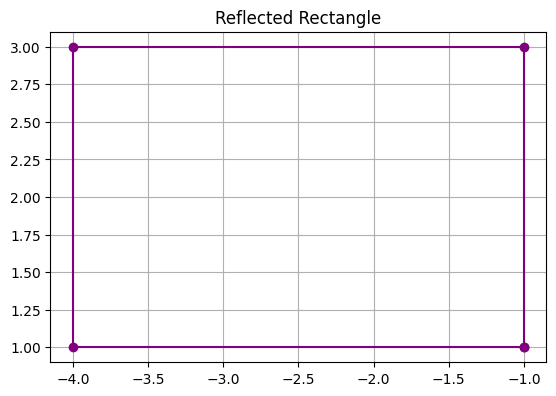

In [ ]:
# Reflection (about y-axis)
reflection_matrix = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 1]])
reflected = rectangle_h @ reflection_matrix.T
plot_object(reflected[:, :2], "Reflected Rectangle", color='purple')

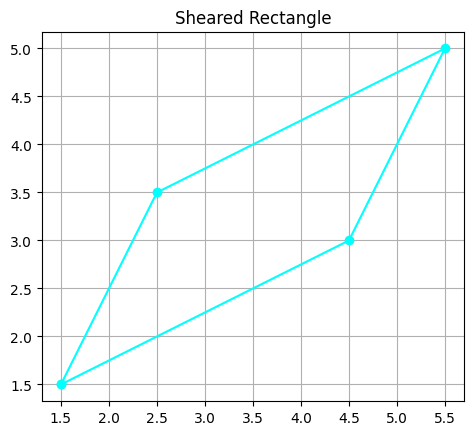

In [ ]:
shear_matrix = np.array([[1, 0.5, 0], [0.5, 1, 0], [0, 0, 1]])
sheared = rectangle_h @ shear_matrix.T
plot_object(sheared[:, :2], "Sheared Rectangle", color='cyan')

TASK 2


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
image = cv2.imread("/content/Picture1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
rows, cols, ch = image.shape

In [ ]:
def display_image(img, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')


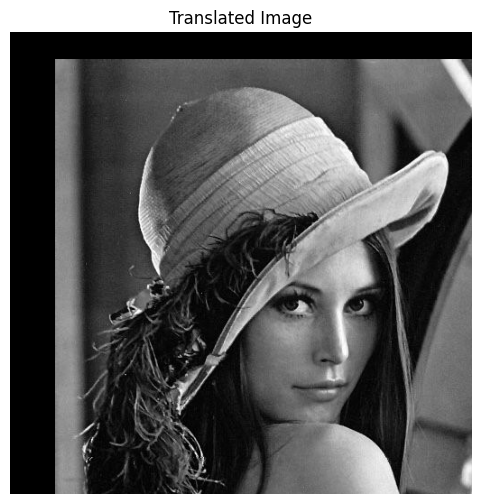

In [ ]:
M_translation = np.float32([[1, 0, 50], [0, 1, 30]])
translated_img = cv2.warpAffine(image, M_translation, (cols, rows))
display_image(translated_img, "Translated Image")


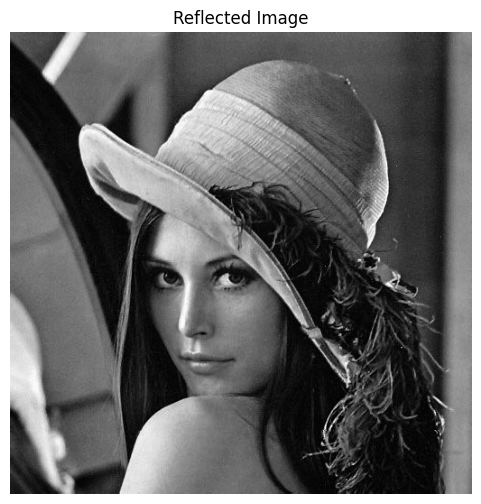

In [ ]:
# Reflection
reflected_img = cv2.flip(image, 1)  # Reflect over y-axis
display_image(reflected_img, "Reflected Image")


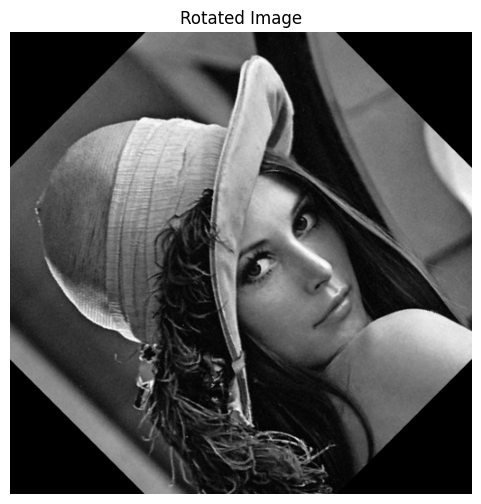

In [ ]:
M_rotation = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)  # Rotate by 45 degrees
rotated_img = cv2.warpAffine(image, M_rotation, (cols, rows))
display_image(rotated_img, "Rotated Image")

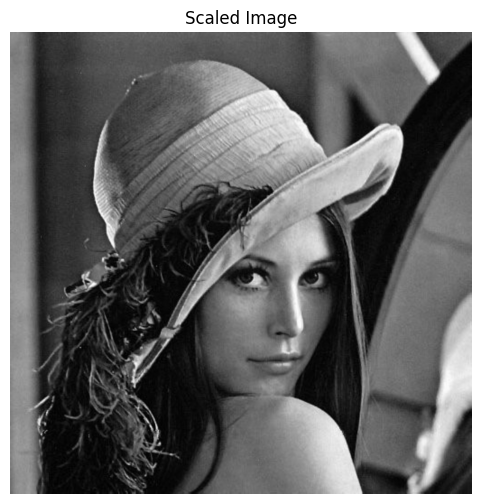

In [ ]:
scaled_img = cv2.resize(image, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)
display_image(scaled_img, "Scaled Image")


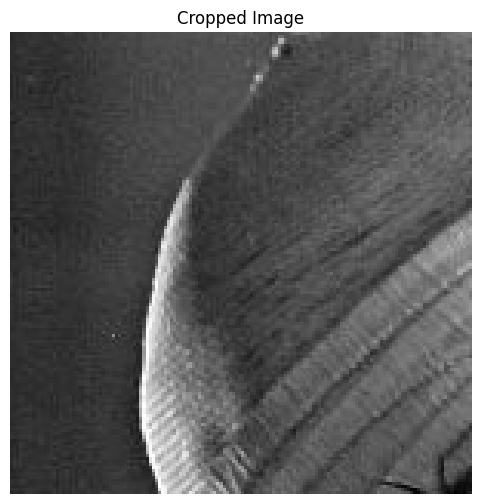

In [ ]:
cropped_img = image[50:200, 50:200]
display_image(cropped_img, "Cropped Image")

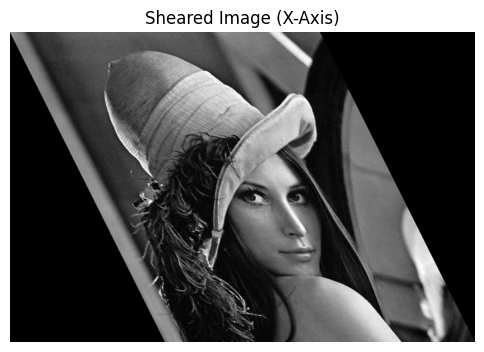

In [ ]:
M_shear_x = np.float32([[1, 0.5, 0], [0, 1, 0]])
sheared_img_x = cv2.warpAffine(image, M_shear_x, (int(cols * 1.5), rows))
display_image(sheared_img_x, "Sheared Image (X-Axis)")


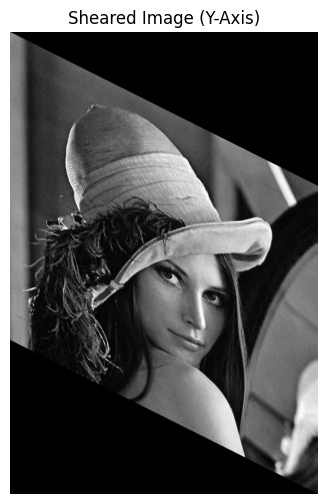

In [ ]:
M_shear_y = np.float32([[1, 0, 0], [0.5, 1, 0]])
sheared_img_y = cv2.warpAffine(image, M_shear_y, (cols, int(rows * 1.5)))
display_image(sheared_img_y, "Sheared Image (Y-Axis)")

plt.show()